<a href="https://colab.research.google.com/github/rafaart/DataScienceCO/blob/develop/spx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mplfinance

In [2]:
import pandas as pd
import numpy as dp
import matplotlib.pyplot as plt
import mplfinance as mpf
import math
from google.colab import files


In [3]:
uploaded = files.upload()


Saving Dados_Historicos_SP500_1979_2024_combinado.csv to Dados_Historicos_SP500_1979_2024_combinado (2).csv


In [4]:
!gdown  '19g5FnCw4sum6y5l0jT0YqTeLVauhhplc'

Downloading...
From: https://drive.google.com/uc?id=19g5FnCw4sum6y5l0jT0YqTeLVauhhplc
To: /content/SPX.xlsx
100% 1.30M/1.30M [00:00<00:00, 91.0MB/s]


In [ ]:
!ls


sample_data  SPX.xlsx


In [5]:
df_dh = pd.read_csv('Dados_Historicos_SP500_1979_2024_combinado.csv')
df_dh.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1979-12-26,"107,80","107,80","108,40","107,10",NaN,"0,09%"
1,1979-12-27,"108,00","108,00","108,50","107,10",NaN,"0,19%"
2,1979-12-28,"107,80","107,80","108,60","107,20",NaN,"-0,19%"
3,1979-12-31,"107,90","107,90","108,50","107,30",NaN,"0,09%"
4,1980-01-01,"107,90","107,90","107,90","107,90",NaN,"0,00%"


In [6]:
tipo = df_dh['Var%'].dtype
print(tipo)

object


In [10]:
# Remover o símbolo de porcentagem da coluna 'Var%'
df_dh['Var%'] = df_dh['Var%'].str.replace('%', '', regex=False).str.strip()
# Remover o símbolo de porcentagem da coluna 'Var%'
df_dh['Var%'] = df_dh['Var%'].str.replace('-', '', regex=False)
# 1. Remover o símbolo de porcentagem e espaços em branco da coluna 'Var%'
df_dh['Var%'] = df_dh['Var%'].str.replace(',', '.', regex=False)


In [11]:
df_dh.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1979-12-26,"107,80","107,80","108,40","107,10",NaN,0.09
1,1979-12-27,"108,00","108,00","108,50","107,10",NaN,0.19
2,1979-12-28,"107,80","107,80","108,60","107,20",NaN,0.19
3,1979-12-31,"107,90","107,90","108,50","107,30",NaN,0.09
4,1980-01-01,"107,90","107,90","107,90","107,90",NaN,0.00


In [12]:
# 3. Converter a coluna para numérico
df_dh['Var%'] = pd.to_numeric(df_dh['Var%'], errors='coerce')

In [16]:
tipo = df_dh['Var%'].dtype
print(tipo)
df_dh.head()

float64


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1979-12-26,"107,80","107,80","108,40","107,10",NaN,0.0009
1,1979-12-27,"108,00","108,00","108,50","107,10",NaN,0.0019
2,1979-12-28,"107,80","107,80","108,60","107,20",NaN,0.0019
3,1979-12-31,"107,90","107,90","108,50","107,30",NaN,0.0009
4,1980-01-01,"107,90","107,90","107,90","107,90",NaN,0.0000


In [20]:
# Verificando se as linhas da coluna 'ultimo' são iguais às da coluna 'abertura'
comparacao = df_dh['Último'] == df_dh['Abertura']
print(comparacao)

0         True
1         True
2         True
3         True
4         True
         ...  
11287    False
11288    False
11289    False
11290    False
11291    False
Length: 11292, dtype: bool


In [14]:
# Dividir todos os valores da coluna 'Var%' por 100
df_dh['Var%'] = df_dh['Var%'] / 100

# Verificar os valores da coluna após a divisão
print(df_dh['Var%'])

0        0.0009
1        0.0019
2        0.0019
3        0.0009
4        0.0000
          ...  
11287    0.0042
11288    0.0093
11289    0.0001
11290    0.0017
11291    0.0090
Name: Var%, Length: 11292, dtype: float64


In [40]:
len(df_dh)

11292

In [43]:
percent = (7988/11292)*100
print(percent)

70.74034714842367


In [47]:
contagem = df_dh[(df_dh['Var%'] < 0)].count()
print(contagem)


Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64


In [45]:
contagem = df_dh[(df_dh['Var%'] > 0) & (df_dh['Var%'] <= 0.009)].count()
print(contagem)

Data        7844
Último      7844
Abertura    7844
Máxima      7844
Mínima      7844
Vol.           0
Var%        7844
dtype: int64


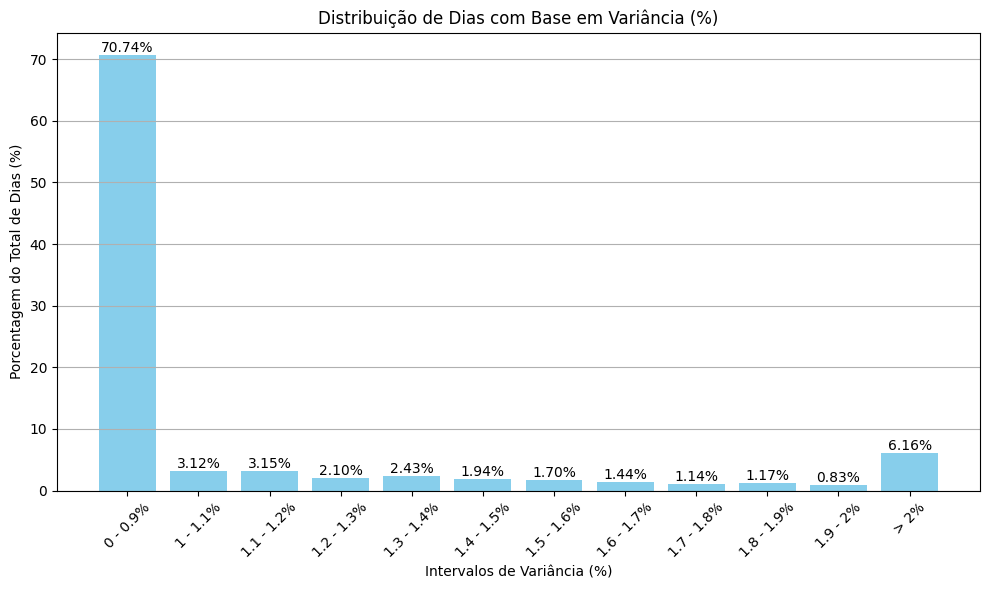

In [49]:
# 2. Contar os dias em cada intervalo
total_dias = len(df_dh)

intervalos = {
    '0 - 0.9%': df_dh[(df_dh['Var%'] >= 0) & (df_dh['Var%'] <= 0.009)].count()['Var%'],
    '1 - 1.1%': df_dh[(df_dh['Var%'] > 0.01) & (df_dh['Var%'] <= 0.011)].count()['Var%'],
    '1.1 - 1.2%': df_dh[(df_dh['Var%'] > 0.011) & (df_dh['Var%'] <= 0.012)].count()['Var%'],
    '1.2 - 1.3%': df_dh[(df_dh['Var%'] > 0.012) & (df_dh['Var%'] <= 0.013)].count()['Var%'],
    '1.3 - 1.4%': df_dh[(df_dh['Var%'] > 0.013) & (df_dh['Var%'] <= 0.014)].count()['Var%'],
    '1.4 - 1.5%': df_dh[(df_dh['Var%'] > 0.014) & (df_dh['Var%'] <= 0.015)].count()['Var%'],
    '1.5 - 1.6%': df_dh[(df_dh['Var%'] > 0.015) & (df_dh['Var%'] <= 0.016)].count()['Var%'],
    '1.6 - 1.7%': df_dh[(df_dh['Var%'] > 0.016) & (df_dh['Var%'] <= 0.017)].count()['Var%'],
    '1.7 - 1.8%': df_dh[(df_dh['Var%'] > 0.017) & (df_dh['Var%'] <= 0.018)].count()['Var%'],
    '1.8 - 1.9%': df_dh[(df_dh['Var%'] > 0.018) & (df_dh['Var%'] <= 0.019)].count()['Var%'],
    '1.9 - 2%': df_dh[(df_dh['Var%'] > 0.019) & (df_dh['Var%'] <= 0.02)].count()['Var%'],
    '> 2%': df_dh[df_dh['Var%'] > 0.02].count()['Var%']
}

# 3. Calcular a porcentagem em relação ao total de dias
percentuais = {key: (value / total_dias) * 100 for key, value in intervalos.items()}

# 4. Criar o gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.bar(percentuais.keys(), percentuais.values(), color='skyblue')

# Adicionar os valores em cima das barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Distribuição de Dias com Base em Variância (%)')
plt.xlabel('Intervalos de Variância (%)')
plt.ylabel('Porcentagem do Total de Dias (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [4]:
df = pd.read_excel('SPX.xlsx')
df.head()

,Date,VIX Index - Last Price (L1),(R1) Open,(R1) High,(R1) Low,(R1) Close,SMAVG (5) on Close,UBB(2),BollMA (20) on Close,LBB(2),...,"Moving Average(Exponential,14)",RSI,Moving Average,BollW (SPX),%B (SPX),ATR(5) (SPX),"MACD(12,26)",Sig(9),Diff,OBV (SPX)
0,1999-01-04,26.17,1229.23,1248.81,1219.10,1228.10,1231.31,1253.41,1195.63,1137.84,...,86.8404,64.9984,62.5017,9.6663,0.7810,19.4208,22.9841,21.0342,1.9499,8.372369e+09
1,1999-01-05,24.46,1228.10,1246.11,1228.10,1244.78,1235.17,1259.90,1199.03,1138.16,...,87.6740,69.0716,64.0759,10.1527,0.8758,18.9505,23.6879,21.5650,2.1229,9.091570e+09
2,1999-01-06,23.34,1244.78,1272.50,1244.78,1272.34,1241.28,1271.69,1203.26,1134.83,...,88.4970,74.3773,65.5572,11.3738,1.0048,21.8737,26.1679,22.4856,3.6823,9.993368e+09
3,1999-01-07,24.37,1272.34,1272.34,1257.68,1269.73,1248.84,1281.11,1207.68,1134.25,...,89.2929,73.0984,66.9682,12.1607,0.9225,19.4691,27.6045,23.5093,4.0952,9.213530e+09
4,1999-01-08,23.28,1269.73,1278.05,1261.85,1275.09,1258.01,1290.36,1212.26,1134.16,...,90.0349,74.0840,68.0927,12.8856,0.9022,18.3794,28.8430,24.5761,4.2670,1.005420e+10


In [5]:
df.columns


Index(['Date', 'VIX Index - Last Price  (L1)', '(R1) Open', '(R1) High',
       '(R1) Low', '(R1) Close', 'SMAVG (5)  on Close', 'UBB(2)',
       'BollMA (20)  on Close', 'LBB(2)', 'SMAVG (50)  on Close',
       'SMAVG (10)  on Close', 'SMAVG (20)  on Close', 'SPX Index - Volume',
       'SMAVG (15)', 'Mom(10)', 'MomMA(5)', 'RMI(Close,14,10)',
       'Moving Average(Exponential,14)', 'RSI', 'Moving Average',
       'BollW (SPX)', '%B (SPX)', 'ATR(5) (SPX)', 'MACD(12,26)', 'Sig(9)',
       'Diff', 'OBV (SPX)'],
      dtype='object')

In [6]:
df.describe()


,Date,VIX Index - Last Price (L1),(R1) Open,(R1) High,(R1) Low,(R1) Close,SMAVG (5) on Close,UBB(2),BollMA (20) on Close,LBB(2),...,"Moving Average(Exponential,14)",RSI,Moving Average,BollW (SPX),%B (SPX),ATR(5) (SPX),"MACD(12,26)",Sig(9),Diff,OBV (SPX)
count,5104,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,...,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5103.000000,5.103000e+03
mean,2009-02-22 02:22:11.661441792,19.882067,1512.997353,1521.853786,1503.460337,1513.211442,1512.557384,1555.165428,1510.104934,1465.044488,...,59.372190,53.408279,53.406356,6.422911,0.561440,19.011107,2.268886,2.262289,0.006598,9.853585e+10
min,1999-01-04 00:00:00,9.140000,679.280000,695.270000,666.790000,676.530000,690.330000,806.270000,736.970000,648.980000,...,1.782100,13.638900,25.351600,1.049500,-0.466800,5.007700,-77.496300,-71.049400,-30.572300,-7.438235e+10
25%,2004-01-29 18:00:00,13.700000,1155.400000,1163.565000,1144.715000,1155.415000,1153.810000,1194.915000,1152.730000,1116.735000,...,39.590000,45.442800,46.704850,3.752850,0.296100,12.354400,-5.574650,-5.139600,-2.715950,7.981041e+09
50%,2009-02-24 12:00:00,18.020000,1339.390000,1348.000000,1329.880000,1339.130000,1339.150000,1379.240000,1336.810000,1294.620000,...,63.161800,54.222900,54.010500,5.440700,0.629600,16.539800,4.899200,4.723100,-0.002900,1.026588e+11
75%,2014-03-20 06:00:00,23.685000,1855.535000,1868.315000,1841.985000,1855.865000,1856.905000,1887.705000,1858.640000,1820.710000,...,81.443200,61.704200,60.318500,7.658400,0.830150,22.332500,12.495400,11.942200,2.693300,1.948018e+11
max,2019-04-15 00:00:00,80.860000,2936.760000,2940.910000,2927.110000,2930.750000,2920.660000,3006.440000,2908.070000,2878.600000,...,99.747100,86.686700,81.377100,42.101900,1.290700,90.076800,47.662600,43.182500,21.919100,2.318354e+11
std,NaN,8.443696,517.394098,517.959428,516.739731,517.471768,516.585790,520.287424,513.614019,508.291548,...,25.323194,11.111542,9.326286,4.212506,0.326064,10.168503,15.147814,14.172392,4.758376,9.399576e+10


In [7]:
df['% Diff'] = abs(df['(R1) Close'].pct_change()) * 100

<ipython-input-7-293a17ff1147>:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['% Diff'] = abs(df['(R1) Close'].pct_change()) * 100


In [8]:
df['% Diff'].head()

,% Diff
0,NaN
1,1.358196
2,2.214046
3,0.205134
4,0.422137


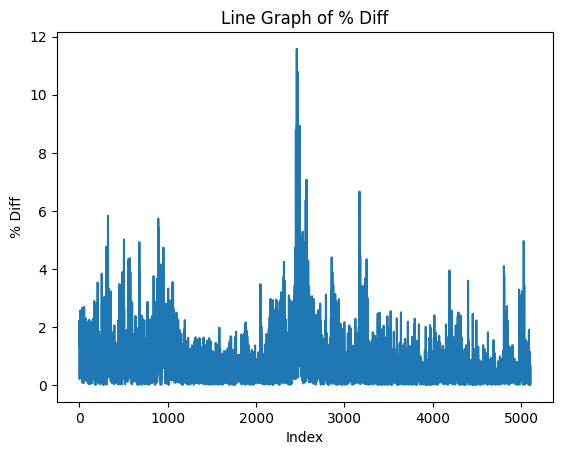

In [9]:
plt.plot(df['% Diff'])
plt.xlabel('Index')
plt.ylabel('% Diff')
plt.title('Line Graph of % Diff')
plt.show()

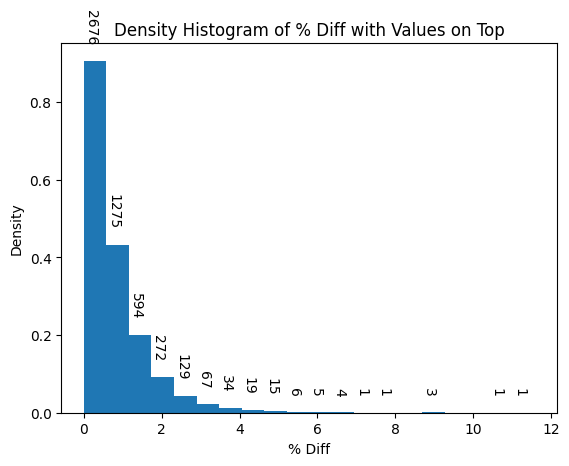

In [10]:


# Calculate histogram values
density, bins, _ = plt.hist(df['% Diff'], density=True, bins=20)

# Calculate count for each bin
count, _ = dp.histogram(df['% Diff'], bins)

# Add text above each bar
for x, y, num in zip(bins, density, count):
  if num != 0:
    plt.text(x, y + 0.05, num, fontsize=10, rotation=-90)

plt.xlabel('% Diff')
plt.ylabel('Density')
plt.title('Density Histogram of % Diff with Values on Top')
plt.show()

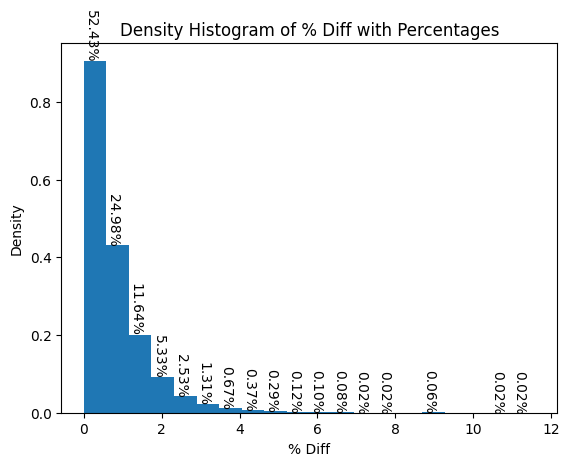

In [11]:


# Calculate histogram values
density, bins, _ = plt.hist(df['% Diff'], density=True, bins=20)

# Calculate percentage for each bin
count, _ = dp.histogram(df['% Diff'], bins)
percent = count / len(df['% Diff']) * 100

# Add text above each bar with percentage
for x, y, perc in zip(bins, density, percent):
  if perc != 0:
    plt.text(x, y + 0.005, f'{perc:.2f}%', fontsize=10, rotation=-90)

plt.xlabel('% Diff')
plt.ylabel('Density')
plt.title('Density Histogram of % Diff with Percentages')
plt.show()

In [51]:
def calcula_cdf_gaussiana(x, mu, sigma):
  """
  Calcula a função de distribuição cumulativa (CDF) de uma distribuição gaussiana.

  Args:
    x: Valor para o qual a CDF deve ser calculada.
    mu: Média da distribuição gaussiana.
    sigma: Desvio padrão da distribuição gaussiana.

  Returns:
    O valor da CDF para o valor x dado.
  """
  z = (x - mu) / (sigma * math.sqrt(2))
  return 0.5 * (1 + math.erf(z))

In [54]:
prob_abaixo_10000 = calcula_cdf_gaussiana(x = 0.015,
                                          mu = df_dh['Var%'].mean(),
                                          sigma = df_dh['Var%'].std())
print(f'Probabilidade: {prob_abaixo_10000:.2f}')

Probabilidade: 0.81


In [22]:
intervalo_provavel = calcula_cdf_gaussiana(x = 2.5 ,
                                          mu = df['% Diff'].mean(),
                                          sigma = df['% Diff'].std()) - (1 - calcula_cdf_gaussiana(x = 2.4,
                                          mu = df['% Diff'].mean(),
                                          sigma = df['% Diff'].std()))
print(f'Probabilidade: {intervalo_provavel:.2f}')

Probabilidade: 0.94


In [57]:
x = 0.01
while x < 0.025:
  y = x+0.001
  intervalo_provavel = calcula_cdf_gaussiana(x = y ,
                                          mu = df_dh['Var%'].mean(),
                                          sigma = df_dh['Var%'].std()) - (1 - calcula_cdf_gaussiana(x = x,
                                          mu = df_dh['Var%'].mean(),
                                          sigma = df_dh['Var%'].std()))
  print(f'Probabilidade do intervalo {x:.2f} - {y:.2f} : {intervalo_provavel:.2f}')
  x += 0.001


Probabilidade do intervalo 0.01 - 0.01 : 0.28
Probabilidade do intervalo 0.01 - 0.01 : 0.36
Probabilidade do intervalo 0.01 - 0.01 : 0.45
Probabilidade do intervalo 0.01 - 0.01 : 0.52
Probabilidade do intervalo 0.01 - 0.02 : 0.59
Probabilidade do intervalo 0.02 - 0.02 : 0.66
Probabilidade do intervalo 0.02 - 0.02 : 0.72
Probabilidade do intervalo 0.02 - 0.02 : 0.77
Probabilidade do intervalo 0.02 - 0.02 : 0.81
Probabilidade do intervalo 0.02 - 0.02 : 0.85
Probabilidade do intervalo 0.02 - 0.02 : 0.88
Probabilidade do intervalo 0.02 - 0.02 : 0.90
Probabilidade do intervalo 0.02 - 0.02 : 0.93
Probabilidade do intervalo 0.02 - 0.02 : 0.94
Probabilidade do intervalo 0.02 - 0.03 : 0.96
